In [29]:
# Simulating the effect of a parasite with matching allele mechanism
library('SciViews')
library ( 'ggplot2')


In [30]:
inffreq = 0 # Frequency of infected individuals 
uninffreq = 1 # Frequency of uninfected individuals 
P = 0.27 # Frequency of recombination


In [31]:
# predicting a
r1 = ln (291)/ (90/24) #intrinsic rate of natural increase in low density 
r2 = ln (191)/ (90/24) #intrinsic rate of natural increase in high density
au = (r1-r2) / 10000  #au is a constant that gives the sensitivity of uninfected host to total population density 
ai = au*1.2 #ai is a constant that gives the sensitivity of infected host to total population density 


In [58]:
# Setting population dynamics parameters 
d = 0.3 # d is the death rate.  Here I set d=1, meaning an annual species.
bu = 2.37 # b is the number of offspring produced by a single  uninfected female (sexual, asexual, or hermaphrodite)
bi = 2.37 # b is the number of offspring produced by a single  infected female (sexual, asexual, or hermaphrodite)
c = 0  # c is a constant that gives the sensitivity of the death rate to density.  Here set = 0.


In [59]:
# C. elegans mating dynamic
B = 0.06 #  the mating efficiency
S = 0.00077 # the population frequencie of males
m = B*(S/(1-S)) #fractions of non-selfing hermaphrodite
u = 0.00075 #fraction of males produced via selfing 


In [60]:
ssex = 1/2 # ssex is the frequency of males in the sexual subpopulation.  (1-ssex) gives the freq of females in sexual population 
sherm = (2*u - (2*u*m) + m)/2 # sherm is the frequency of males in the hermaphrodite subpopulation.  (1-sherm) gives the freq of females in hermaphrodite population 


In [61]:
# anayltical solutions: carrying capacities for sexual and asexuals are set by the parameters given above
Ksex = ((1-ssex)*(bi*inffreq + bu * uninffreq) - d)/((1-ssex)*(ai*inffreq + au * uninffreq) + c) #solution for carrying capacity of sexual population
Kherm = ((1-sherm)*(bi*inffreq + bu * uninffreq)-d)/((1-sherm)*(ai*inffreq + au * uninffreq) + c) #solution for carrying capacity of hermaphrodite population
Kasex = ((bi*inffreq + bu * uninffreq)-d) / ((ai*inffreq + au * uninffreq) + c) #solution for carrying capacity of asexual population


In [62]:
# initial conditions.  Sex initiated at Ksex.  Asex at 0.
Sex = Ksex 
Asex = 0
Herm = 0 


In [63]:
# setting introduction time of Hermaphrodite, Asexual, parasite 
Gherm = 500  #generation at which a single hermaphrodite female is introduced
Gasex = 600 #generation at which a single asexual female is introduced
Gpara = 1


In [64]:
# setting number of generartions in each simulation 
T = 10000 # T is the number of time steps in addition to time step 0
time = c(1:T)  #sets up do loop for i = 1 to T


In [65]:
# haploid organism and 2 loci 
# frequencies of allele in sexual population 

rNumber = vector() 
rNumber[1] = 0.2
rNumber[2] = 0.6
rNumber[3] = 0.4
rNumber[4] = 0.6
SUmrNumber = sum (rNumber)

gAB0 = rNumber[1] / SUmrNumber
gAb0 = rNumber[2] / SUmrNumber
gaB0 = rNumber[3] / SUmrNumber
gab0 = rNumber[4] / SUmrNumber

SexHostGeneSpace = vector()  #shows frequencies of every genotypes in the  initial sexual host population
SexHostGeneSpace[1] = gAB0 * gAB0 * Sex
SexHostGeneSpace[2] = gAb0 * gAb0 * Sex
SexHostGeneSpace[3] = gaB0 * gaB0 * Sex
SexHostGeneSpace[4] = gab0 * gab0 * Sex
SexHostGeneSpace[5] = 2 * gAB0 * gAb0 * Sex
SexHostGeneSpace[6] = 2 * gAB0 * gaB0 * Sex
SexHostGeneSpace[7] = 2 * gAB0 * gab0 * Sex
SexHostGeneSpace[8] = 2 * gAb0 * gaB0 * Sex
SexHostGeneSpace[9] = 2 * gAb0 * gab0 * Sex
SexHostGeneSpace[10] = 2 * gaB0 * gab0 * Sex 


SexHostGeneSpaceInf = vector() # shows frequencies of every genotypes in the initial infected sexual host population
SexHostGeneSpaceUninf = vector() # shows frequencies of every genotypes in the initial uninfected sexual host population


In [66]:
# haploid organism and 2 loci 
# frequencies of allele in sexual population 

rNumber = vector() 
rNumber[1] = 0.2
rNumber[2] = 0.6
rNumber[3] = 0.4
rNumber[4] = 0.6
SUmrNumber = sum (rNumber)

gAB0 = rNumber[1] / SUmrNumber
gAb0 = rNumber[2] / SUmrNumber
gaB0 = rNumber[3] / SUmrNumber
gab0 = rNumber[4] / SUmrNumber

AsexHostGeneSpace = vector()  #shows frequencies of every genotypes in the  initial asexual host population
AsexHostGeneSpace[1] = gAB0 * gAB0 * 200
AsexHostGeneSpace[2] = gAb0 * gAb0 * 200
AsexHostGeneSpace[3] = gaB0 * gaB0 * 200
AsexHostGeneSpace[4] = gab0 * gab0 * 200
AsexHostGeneSpace[5] = 2 * gAB0 * gAb0 * 200
AsexHostGeneSpace[6] = 2 * gAB0 * gaB0 * 200
AsexHostGeneSpace[7] = 2 * gAB0 * gab0 * 200
AsexHostGeneSpace[8] = 2 * gAb0 * gaB0 * 200
AsexHostGeneSpace[9] = 2 * gAb0 * gab0 * 200
AsexHostGeneSpace[10] = 2 * gaB0 * gab0 * 200


AsexHostGeneSpaceInf = vector() # shows frequencies of every genotypes in the initial infected asexual host population
AsexHostGeneSpaceUninf = vector() # shows frequencies of every genotypes in the initial uninfected asexual host population


In [67]:
# haploid organism and 2 loci 
# frequencies of allele in sexual population 

rNumber = vector() 
rNumber[1] = 0.2
rNumber[2] = 0.6
rNumber[3] = 0.4
rNumber[4] = 0.6
SUmrNumber = sum (rNumber)

gAB0 = rNumber[1] / SUmrNumber
gAb0 = rNumber[2] / SUmrNumber
gaB0 = rNumber[3] / SUmrNumber
gab0 = rNumber[4] / SUmrNumber

HermHostGeneSpace = vector() # shows frequencies of every genotypes in the  initial sexual host population
HermHostGeneSpace[1] = gAB0 * gAB0 * 2
HermHostGeneSpace[2] = gAb0 * gAb0 * 2
HermHostGeneSpace[3] = gaB0 * gaB0 * 2
HermHostGeneSpace[4] = gab0 * gab0 * 2
HermHostGeneSpace[5] = 2 * gAB0 * gAb0 * 2
HermHostGeneSpace[6] = 2 * gAB0 * gaB0 * 2
HermHostGeneSpace[7] = 2 * gAB0 * gab0 * 2
HermHostGeneSpace[8] = 2 * gAb0 * gaB0 * 2
HermHostGeneSpace[9] = 2 * gAb0 * gab0 * 2
HermHostGeneSpace[10] = 2 * gaB0 * gab0 * 2


HermHostGeneSpaceInf = vector() # shows frequencies of every genotypes in the initial infected asexual host population
HermHostGeneSpaceUninf = vector() # shows frequencies of every genotypes in the initial uninfected asexual host population


In [68]:
# haploid organism and 2 loci 
# frequencies of allele in sexual population 
rNumber = vector() 
rNumber[1] = 0.2
rNumber[2] = 0.6
rNumber[3] = 0.4
rNumber[4] = 0.6
SUmrNumber = sum (rNumber)

gAB0 = rNumber[1] / SUmrNumber
gAb0 = rNumber[2] / SUmrNumber
gaB0 = rNumber[3] / SUmrNumber
gab0 = rNumber[4] / SUmrNumber


ParaGeneSpace = vector() # shows frequencies of every genotypes in the  initial sexual host population
ParaGeneSpace[1] = gAB0 * gAB0 
ParaGeneSpace[2] = gAb0 * gAb0 
ParaGeneSpace[3] = gaB0 * gaB0 
ParaGeneSpace[4] = gab0 * gab0 
ParaGeneSpace[5] = 2 * gAB0 * gAb0 
ParaGeneSpace[6] = 2 * gAB0 * gaB0 
ParaGeneSpace[7] = 2 * gAB0 * gab0 
ParaGeneSpace[8] = 2 * gAb0 * gaB0 
ParaGeneSpace[9] = 2 * gAb0 * gab0 
ParaGeneSpace[10] = 2 * gaB0 * gab0 


In [69]:
# initial conditions.  SexHost initiated at Ksex.  AsexHost at 0. HermHost at 0.
SexHost = Sex 
AsexHost = 0
HermHost = 0

# initial conditions.  Para initiated at 0.  
Para = 0


In [70]:
# introducing vectors 
outSexHost = vector()  # outSexHost vector
outSexHost[1]=SexHost[1]

outHermHost = vector() # outHermHost vector
outHermHost[1] = AsexHost[1]

outAsexHost = vector()  # outAsexHost  vector
outAsexHost[1]=AsexHost[1]

outPara = vector()  # outPara vector
outPara[1]=Para[1]


In [71]:
gABSex = vector()
gAbSex = vector()
gaBSex = vector()
gabSex = vector() 

nABSex = vector()
nAbSex = vector()
naBSex = vector()
nabSex = vector()

gABSex[1] = gAB0 
gAbSex[1] = gAb0 
gaBSex[1] = gaB0 
gabSex[1] = gab0 


nABSex[1] = gAB0 * Sex
nAbSex[1] = gAb0 * Sex
naBSex[1] = gaB0 * Sex
nabSex[1] = gab0 * Sex


In [72]:
gABHerm = vector()
gAbHerm = vector()
gaBHerm = vector()
gabHerm = vector() 

nABHerm = vector()
nAbHerm = vector()
naBHerm = vector()
nabHerm = vector()

gABHerm[1] = gAB0 
gAbHerm[1] = gAb0 
gaBHerm[1] = gaB0 
gabHerm[1] = gab0 


nABHerm[1] = gAB0 * 2 
nAbHerm[1] = gAb0 * 2 
naBHerm[1] = gaB0 * 2
nabHerm[1] = gab0 * 2


In [73]:
gABAsex = vector()
gAbAsex = vector()
gaBAsex = vector()
gabAsex = vector() 

nABAsex = vector()
nAbAsex = vector()
naBAsex = vector()
nabAsex = vector()

gABAsex[1] = gAB0 
gAbAsex[1] = gAb0 
gaBAsex[1] = gaB0 
gabAsex[1] = gab0 


nABAsex[1] = gAB0 * 200
nAbAsex[1] = gAb0 * 200
naBAsex[1] = gaB0 * 200
nabAsex[1] = gab0 * 200


In [74]:
DSex = vector()
DHerm = vector()
DAsex = vector()


In [75]:
# calculation of abundance through generations 
for(i in 1: T) {

  if (i >= Gpara) {
    
    Para[i] = 2 # setting initial parasite population 
    
  } else  {
    
    Para[i] = 0
    
  }
  if(i == Gherm)
  {
    
    HermHost[i] =  2 #  setting initial hermaphrodite population 
    
  }
  if (is.na(HermHost[i])){
    
    HermHost[i] = 0
    
  }
  if(i == Gasex)
  {
    
    AsexHost[i] =  200 #  setting initial hermaphrodite population 
    
  }
  if (is.na(AsexHost[i])){
    
    AsexHost[i] = 0
    
  }
  
  SumInfHerm = 0
  SumInfSex = 0 
  SumInfAsex = 0 
  ####################################################################################################################################################################  
  # Sexual Host 
  outSexHost[i] = SexHost[i]
  
  

    
    # calculating  infection 
    if (Para[i] == 0) {
      for( z in 1:length(SexHostGeneSpace) ) {
      SexHostGeneSpaceInf[z] = 0
      SexHostGeneSpaceUninf[z] = SexHostGeneSpace[z]
      if( is.na(SexHostGeneSpaceUninf[z]) ) {SexHostGeneSpaceUninf[z] = 0 }
      }
    } else {
      
      SexHostGeneSpaceInf[1] = SexHostGeneSpace[1] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] )
      SexHostGeneSpaceInf[2] = SexHostGeneSpace[2] * (ParaGeneSpace[2] + ParaGeneSpace[9])
      SexHostGeneSpaceInf[3] = SexHostGeneSpace[3] * (ParaGeneSpace[3] + ParaGeneSpace[10])
      SexHostGeneSpaceInf[4] = SexHostGeneSpace[4] * (ParaGeneSpace[4])
      SexHostGeneSpaceInf[5] = SexHostGeneSpace[5] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[6] = SexHostGeneSpace[6] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[7] = SexHostGeneSpace[7] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[8] = SexHostGeneSpace[8] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[9] = SexHostGeneSpace[9] * (ParaGeneSpace[2] + ParaGeneSpace[9])
      SexHostGeneSpaceInf[10] = SexHostGeneSpace[10] * (ParaGeneSpace[3] + ParaGeneSpace[10])
      
      SexHostGeneSpaceUninf[1] = SexHostGeneSpace[1] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] ))
      SexHostGeneSpaceUninf[2] = SexHostGeneSpace[2] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
      SexHostGeneSpaceUninf[3] = SexHostGeneSpace[3] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
      SexHostGeneSpaceUninf[4] = SexHostGeneSpace[4] * ( 1- (ParaGeneSpace[4]))
      SexHostGeneSpaceUninf[5] = SexHostGeneSpace[5] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[6] = SexHostGeneSpace[6] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[7] = SexHostGeneSpace[7] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[8] = SexHostGeneSpace[8] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[9] = SexHostGeneSpace[9] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
      SexHostGeneSpaceUninf[10] = SexHostGeneSpace[10] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
      
      if( is.na(SexHostGeneSpaceInf[z]) ) {SexHostGeneSpaceInf[z] = 0 }
      if( is.na(SexHostGeneSpaceUninf[z]) ) {SexHostGeneSpaceUninf[z] = 0 }
    }


  
  nABSex[i+1] = (  ( SexHostGeneSpaceUninf[1] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[5] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[6] * 0.5  *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 *  P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))     
  nABSex[i+1] = nABSex[i+1] + (  ( SexHostGeneSpaceInf[1] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[5] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[6] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * ( 1- P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * P )  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  nAbSex[i+1] = (  ( SexHostGeneSpaceUninf[2] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[5] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))  + ( SexHostGeneSpaceUninf[9] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 * ( 1- P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  nAbSex[i+1] = nAbSex[i+1] + (  ( SexHostGeneSpaceInf[2] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[5] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[9] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * ( 1- P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * P )  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  naBSex[i+1] = (  ( SexHostGeneSpaceUninf[3] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[6] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[10] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 * (1 - P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  naBSex[i+1] = naBSex[i+1] + (  ( SexHostGeneSpaceInf[3] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[6] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[10] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * (1 - P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * P ) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  nabSex[i+1] = (  ( SexHostGeneSpaceUninf[4] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[10] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[9] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 * P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  nabSex[i+1] = nabSex[i+1] + (  ( SexHostGeneSpaceInf[4] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[10] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[9] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * (1 - P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * P ) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
  
  #nABSex[i+1] = ( ( SexHostGeneSpaceInf[1] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[1] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 *  P *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
  #nAbSex[i+1] = ( ( SexHostGeneSpaceInf[2] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[2] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
  #naBSex[i+1] = ( ( SexHostGeneSpaceInf[3] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[3] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
  #naBSex[i+1] = ( ( SexHostGeneSpaceInf[4] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[4] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
  
  if( is.na(nABSex[i+1]) ) {nABSex[i+1] = 0 }
  if( is.na(nAbSex[i+1]) ) {nAbSex[i+1] = 0 }
  if( is.na(naBSex[i+1]) ) {naBSex[i+1] = 0 }
  if( is.na(nabSex[i+1]) ) {nabSex[i+1] = 0 }    
  
  
  if(nABSex[i+1] < 0.01) {nABSex[i+1] = 0 }
  if(nAbSex[i+1] < 0.01) {nAbSex[i+1] = 0 }
  if(naBSex[i+1] < 0.01) {naBSex[i+1] = 0 }
  if(nabSex[i+1] < 0.01) {nabSex[i+1] = 0 }
  
  
  
  SexHost[i+1] =  SexHost[i] + nABSex[i+1] + nAbSex[i+1] + naBSex[i+1] + nabSex[i+1] - d *(SexHost[i])
  n[i] = nABSex[i+1] + nAbSex[i+1] + naBSex[i+1] + nabSex[i+1]
  
  nABSex[i+1] = nABSex[i+1] + nABSex[i] * (1-d)
  nAbSex[i+1] = nAbSex[i+1] + nAbSex[i] * (1-d)
  naBSex[i+1] = naBSex[i+1] + naBSex[i] * (1-d)
  nabSex[i+1] = nabSex[i+1] + nabSex[i] * (1-d)
  
  gABSex[i + 1] = nABSex[i+1] / SexHost[i+1]
  gAbSex[i + 1] = nAbSex[i+1] / SexHost[i+1]
  gaBSex[i + 1] = naBSex[i+1] / SexHost[i+1]
  gabSex[i + 1] = nabSex[i+1] / SexHost[i+1] 
  DSex[i] = ( gABSex[i + 1] * gabSex[i + 1] ) - (gAbSex[i + 1] * gaBSex[i + 1])
  
  if( is.na(gABSex[i+1]) ) {gABSex[i+1] = 0 }
  if( is.na(gAbSex[i+1]) ) {gAbSex[i+1] = 0 }
  if( is.na(gaBSex[i+1]) ) {gaBSex[i+1] = 0 }
  if( is.na(gabSex[i+1]) ) {gabSex[i+1] = 0 }    
  
  
  SexHostGeneSpace[1] = gABSex[i + 1] * gABSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[2] = gAbSex[i + 1] * gAbSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[3] = gaBSex[i + 1] * gaBSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[4] = gabSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[5] = 2 * gABSex[i + 1] * gAbSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[6] = 2 * gABSex[i + 1] * gaBSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[7] = 2 * gABSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[8] = 2 * gAbSex[i + 1] * gaBSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[9] = 2 * gAbSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
  SexHostGeneSpace[10] = 2 * gaBSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
  
  
  
  
  # calculating abundance of infecteds 
  for (z in 1:length(SexHostGeneSpace)) {
    
    SumInfSex = SumInfSex + SexHostGeneSpaceInf[z] 
    
  }
  
  
  # setting a minimum abundance for host population 
  if ( SexHost[i] < 0.001) {
    
    SexHost[i+1] = 0
    
  }
  
  #############################################################################################################################################################################################  
  
  # Hermaphrodite Host 
  outHermHost[i] = HermHost[i]
  if (HermHost[i] == 0){
    
    HermHost[i+1] = 0
    nABHerm[i+1] = nABHerm[1] 
    nAbHerm[i+1] = nAbHerm[1] 
    naBHerm[i+1] = naBHerm[1] 
    nabHerm[i+1] = nabHerm[1] 
    for( z in 1:length(HermHostGeneSpace) ) {
      
      
      HermHostGeneSpaceInf[z] = 0
      HermHostGeneSpaceUninf[z] = 0
      
    }
    
  } else { 
    for( z in 1:length(HermHostGeneSpace) ) {
      
      # calculating  infection 
      if (Para[i] == 0) {
        
        HermHostGeneSpaceInf[z] = 0
        HermHostGeneSpaceUninf[z] = HermHostGeneSpace[z]
        if( is.na(HermHostGeneSpaceUninf[z]) ) {HermHostGeneSpaceUninf[z] = 0 }
        
      } else {
        
        HermHostGeneSpaceInf[1] = HermHostGeneSpace[1] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] )
        HermHostGeneSpaceInf[2] = HermHostGeneSpace[2] * (ParaGeneSpace[2] + ParaGeneSpace[9])
        HermHostGeneSpaceInf[3] = HermHostGeneSpace[3] * (ParaGeneSpace[3] + ParaGeneSpace[10])
        HermHostGeneSpaceInf[4] = HermHostGeneSpace[4] * (ParaGeneSpace[4])
        HermHostGeneSpaceInf[5] = HermHostGeneSpace[5] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        HermHostGeneSpaceInf[6] = HermHostGeneSpace[6] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        HermHostGeneSpaceInf[7] = HermHostGeneSpace[7] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        HermHostGeneSpaceInf[8] = HermHostGeneSpace[8] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        HermHostGeneSpaceInf[9] = HermHostGeneSpace[9] * (ParaGeneSpace[2] + ParaGeneSpace[9])
        HermHostGeneSpaceInf[10] = HermHostGeneSpace[10] * (ParaGeneSpace[3] + ParaGeneSpace[10])
        
        HermHostGeneSpaceUninf[1] = HermHostGeneSpace[1] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] ))
        HermHostGeneSpaceUninf[2] = HermHostGeneSpace[2] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
        HermHostGeneSpaceUninf[3] = HermHostGeneSpace[3] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
        HermHostGeneSpaceUninf[4] = HermHostGeneSpace[4] * ( 1- (ParaGeneSpace[4]))
        HermHostGeneSpaceUninf[5] = HermHostGeneSpace[5] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        HermHostGeneSpaceUninf[6] = HermHostGeneSpace[6] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        HermHostGeneSpaceUninf[7] = HermHostGeneSpace[7] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        HermHostGeneSpaceUninf[8] = HermHostGeneSpace[8] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        HermHostGeneSpaceUninf[9] = HermHostGeneSpace[9] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
        HermHostGeneSpaceUninf[10] = HermHostGeneSpace[10] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))

        if( is.na(HermHostGeneSpaceInf[z]) ) {HermHostGeneSpaceInf[z] = 0 }
        if( is.na(HermHostGeneSpaceUninf[z]) ) {HermHostGeneSpaceUninf[z] = 0 }
        
      }
      
    }
    
    nABHerm[i+1] = (  ( HermHostGeneSpaceUninf[1] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[5] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[6] * 0.5  *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 *  P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))     
    nABHerm[i+1] = nABHerm[i+1] + (  ( HermHostGeneSpaceInf[1] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[5] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[6] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * ( 1- P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * P )  *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nAbHerm[i+1] = (  ( HermHostGeneSpaceUninf[2] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[5] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))  + ( HermHostGeneSpaceUninf[9] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 * ( 1- P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nAbHerm[i+1] = nAbHerm[i+1] + (  ( HermHostGeneSpaceInf[2] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[5] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[9] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * ( 1- P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * P )  *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    naBHerm[i+1] = (  ( HermHostGeneSpaceUninf[3] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[6] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[10] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 * (1 - P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    naBHerm[i+1] = naBHerm[i+1] + (  ( HermHostGeneSpaceInf[3] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[6] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[10] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * (1 - P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * P ) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nabHerm[i+1] = (  ( HermHostGeneSpaceUninf[4] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[10] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[9] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 * P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nabHerm[i+1] = nabHerm[i+1] + (  ( HermHostGeneSpaceInf[4] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[10] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[9] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * (1 - P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * P ) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    
    #nABSex[i+1] = ( ( HermHostGeneSpaceInf[1] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[1] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 *  P *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #nAbSex[i+1] = ( ( HermHostGeneSpaceInf[2] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[2] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #naBSex[i+1] = ( ( HermHostGeneSpaceInf[3] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[3] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #naBSex[i+1] = ( ( HermHostGeneSpaceInf[4] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[4] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    
    if( is.na(nABHerm[i+1]) ) {nABHerm[i+1] = 0 }
    if( is.na(nAbHerm[i+1]) ) {nAbHerm[i+1] = 0 }
    if( is.na(naBHerm[i+1]) ) {naBHerm[i+1] = 0 }
    if( is.na(nabHerm[i+1]) ) {nabHerm[i+1] = 0 }    
    
    
    if(nABHerm[i+1] < 0) {nABHerm[i+1] = 0 }
    if(nAbHerm[i+1] < 0) {nAbHerm[i+1] = 0 }
    if(naBHerm[i+1] < 0) {naBHerm[i+1] = 0 }
    if(nabHerm[i+1] < 0) {nabHerm[i+1] = 0 }
    
    
    
    HermHost[i+1] = HermHost[i] + nABHerm[i+1] + nAbHerm[i+1] + naBHerm[i+1] + nabHerm[i+1] - d * (HermHost[i])
    
    nABHerm[i+1] = nABHerm[i+1] + nABHerm[i] * (1-d)
    nAbHerm[i+1] = nAbHerm[i+1] + nAbHerm[i] * (1-d)
    naBHerm[i+1] = naBHerm[i+1] + naBHerm[i] * (1-d)
    nabHerm[i+1] = nabHerm[i+1] + nabHerm[i] * (1-d)
    
    gABHerm[i + 1] = nABHerm[i+1] / HermHost[i+1]
    gAbHerm[i + 1] = nAbHerm[i+1] / HermHost[i+1]
    gaBHerm[i + 1] = naBHerm[i+1] / HermHost[i+1]
    gabHerm[i + 1] = nabHerm[i+1] / HermHost[i+1] 
    DHerm[i] = ( gABHerm[i + 1] * gabHerm[i + 1] ) - (gAbHerm[i + 1] * gaBHerm[i + 1])
    
    if( is.na(gABHerm[i+1]) ) {gABHerm[i+1] = 0 }
    if( is.na(gAbHerm[i+1]) ) {gAbHerm[i+1] = 0 }
    if( is.na(gaBHerm[i+1]) ) {gaBHerm[i+1] = 0 }
    if( is.na(gabHerm[i+1]) ) {gabHerm[i+1] = 0 }    
    
    
    
    HermHostGeneSpace[1] = gABHerm[i + 1] * gABHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[2] = gAbHerm[i + 1] * gAbHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[3] = gaBHerm[i + 1] * gaBHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[4] = gabHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[5] = 2 * gABHerm[i + 1] * gAbHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[6] = 2 * gABHerm[i + 1] * gaBHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[7] = 2 * gABHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[8] = 2 * gAbHerm[i + 1] * gaBHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[9] = 2 * gAbHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
    HermHostGeneSpace[10] = 2 * gaBHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
    
    
    
    
    # calculating abundance of infecteds 
    for (z in 1:length(HermHostGeneSpace)) {
      
      SumInfHerm = SumInfHerm + HermHostGeneSpaceInf[z] 
      
    }
    
    
    # setting a minimum abundance for host population 
    if ( HermHost[i] < 0.001) {
      
      HermHost[i+1] = 0
      
    }
    
    
  }
  #######################################################################################################################################    
  
  
  # Asexual Host 
  outAsexHost[i] = AsexHost[i]
  if (AsexHost[i] == 0){
    
    nABAsex[i+1] = nABAsex[1] 
    nAbAsex[i+1] = nAbAsex[1] 
    naBAsex[i+1] = naBAsex[1] 
    nabAsex[i+1] = nabAsex[1] 
    
    AsexHost[i+1] = 0 
    for( z in 1:length(AsexHostGeneSpace) ) {
      
      
      AsexHostGeneSpaceInf[z] = 0
      AsexHostGeneSpaceUninf[z] = 0
      
    }
    
  } else { 
   
      
      # calculating  infection 
      if (Para[i] == 0) {
        for( z in 1:length(AsexHostGeneSpace) ) {
        AsexHostGeneSpaceInf[z] = 0
        AsexHostGeneSpaceUninf[z] = AsexHostGeneSpace[z]
        if( is.na(AsexHostGeneSpaceUninf[z]) ) {AsexHostGeneSpaceUninf[z] = 0 }
        }
        
      } else {
        
        AsexHostGeneSpaceInf[1] = AsexHostGeneSpace[1] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] )
        AsexHostGeneSpaceInf[2] = AsexHostGeneSpace[2] * (ParaGeneSpace[2] + ParaGeneSpace[9])
        AsexHostGeneSpaceInf[3] = AsexHostGeneSpace[3] * (ParaGeneSpace[3] + ParaGeneSpace[10])
        AsexHostGeneSpaceInf[4] = AsexHostGeneSpace[4] * (ParaGeneSpace[4])
        AsexHostGeneSpaceInf[5] = AsexHostGeneSpace[5] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[6] = AsexHostGeneSpace[6] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[7] = AsexHostGeneSpace[7] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[8] = AsexHostGeneSpace[8] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[9] = AsexHostGeneSpace[9] * (ParaGeneSpace[2] + ParaGeneSpace[9])
        AsexHostGeneSpaceInf[10] = AsexHostGeneSpace[10] * (ParaGeneSpace[3] + ParaGeneSpace[10])
        
        AsexHostGeneSpaceUninf[1] = AsexHostGeneSpace[1] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] ))
        AsexHostGeneSpaceUninf[2] = AsexHostGeneSpace[2] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
        AsexHostGeneSpaceUninf[3] = AsexHostGeneSpace[3] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
        AsexHostGeneSpaceUninf[4] = AsexHostGeneSpace[4] * ( 1- (ParaGeneSpace[4]))
        AsexHostGeneSpaceUninf[5] = AsexHostGeneSpace[5] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[6] = AsexHostGeneSpace[6] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[7] = AsexHostGeneSpace[7] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[8] = AsexHostGeneSpace[8] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[9] = AsexHostGeneSpace[9] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
        AsexHostGeneSpaceUninf[10] = AsexHostGeneSpace[10] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))

        if( is.na(AsexHostGeneSpaceInf[z]) ) {AsexHostGeneSpaceInf[z] = 0 }
        if( is.na(AsexHostGeneSpaceUninf[z]) ) {AsexHostGeneSpaceUninf[z] = 0 }
        
      }
      
    
    
    nABAsex[i+1] = (  ( AsexHostGeneSpaceUninf[1] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[7] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) )    
    nABAsex[i+1] = nABAsex[i+1] + (  ( AsexHostGeneSpaceInf[1] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[5] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[6] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[7] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    nAbAsex[i+1] = (  ( AsexHostGeneSpaceUninf[2] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))  + ( AsexHostGeneSpaceUninf[9] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[8] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    nAbAsex[i+1] = nAbAsex[i+1] + (  ( AsexHostGeneSpaceInf[2] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[5] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[9] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[8] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    naBAsex[i+1] = (  ( AsexHostGeneSpaceUninf[3] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[8] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    naBAsex[i+1] = naBAsex[i+1] + (  ( AsexHostGeneSpaceInf[3] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[6] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[10] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[8] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    nabAsex[i+1] = (  ( AsexHostGeneSpaceUninf[4] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[9] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[7] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    nabAsex[i+1] = nabAsex[i+1] + (  ( AsexHostGeneSpaceInf[4] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[10] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[9] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[7] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
    
    #nABSex[i+1] = ( ( AsexHostGeneSpaceInf[1] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[1] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 *  P *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #nAbSex[i+1] = ( ( AsexHostGeneSpaceInf[2] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[2] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #naBSex[i+1] = ( ( AsexHostGeneSpaceInf[3] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[3] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #naBSex[i+1] = ( ( AsexHostGeneSpaceInf[4] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[4] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    
    if( is.na(nABAsex[i+1]) ) {nABAsex[i+1] = 0 }
    if( is.na(nAbAsex[i+1]) ) {nAbAsex[i+1] = 0 }
    if( is.na(naBAsex[i+1]) ) {naBAsex[i+1] = 0 }
    if( is.na(nabAsex[i+1]) ) {nabAsex[i+1] = 0 }    
    
    
    if(nABAsex[i+1] < 0) {nABAsex[i+1] = 0 }
    if(nAbAsex[i+1] < 0) {nAbAsex[i+1] = 0 }
    if(naBAsex[i+1] < 0) {naBAsex[i+1] = 0 }
    if(nabAsex[i+1] < 0) {nabAsex[i+1] = 0 }
    
    
    
    AsexHost[i+1] = AsexHost[i] + nABAsex[i+1] + nAbAsex[i+1] + naBAsex[i+1] + nabAsex[i+1] - d * (AsexHost[i])
    
    
    nABAsex[i+1] = nABAsex[i+1] + nABAsex[i] * (1-d)
    nAbAsex[i+1] = nAbAsex[i+1] + nAbAsex[i] * (1-d)
    naBAsex[i+1] = naBAsex[i+1] + naBAsex[i] * (1-d)
    nabAsex[i+1] = nabAsex[i+1] + nabAsex[i] * (1-d)
    
    gABAsex[i + 1] = nABAsex[i+1] / AsexHost[i+1]
    gAbAsex[i + 1] = nAbAsex[i+1] / AsexHost[i+1]
    gaBAsex[i + 1] = naBAsex[i+1] / AsexHost[i+1]
    gabAsex[i + 1] = nabAsex[i+1] / AsexHost[i+1]
    
    
    if( is.na(gABAsex[i+1]) ) {gABAsex[i+1] = 0 }
    if( is.na(gAbAsex[i+1]) ) {gAbAsex[i+1] = 0 }
    if( is.na(gaBAsex[i+1]) ) {gaBAsex[i+1] = 0 }
    if( is.na(gabAsex[i+1]) ) {gabAsex[i+1] = 0 }    
    
    DHerm[i] = ( gABAsex[i + 1] * gAbAsex[i + 1] ) - (gaBAsex[i + 1] * gabAsex[i + 1])
    
    
    AsexHostGeneSpace[1] = gABAsex[i + 1] * gABAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[2] = gAbAsex[i + 1] * gAbAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[3] = gaBAsex[i + 1] * gaBAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[4] = gabAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[5] = 2 * gABAsex[i + 1] * gAbAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[6] = 2 * gABAsex[i + 1] * gaBAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[7] = 2 * gABAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[8] = 2 * gAbAsex[i + 1] * gaBAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[9] = 2 * gAbAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
    AsexHostGeneSpace[10] = 2 * gaBAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
    
    
    
    
    # calculating abundance of infecteds 
    for (z in 1:length(AsexHostGeneSpace)) {
      
      SumInfAsex = SumInfAsex + AsexHostGeneSpaceInf[z] 
      
    }
    
    
    # setting a minimum abundance for host population 
    if ( AsexHost[i] < 0.1) {
      
      AsexHost[i+1] = 0
      
    }
    
    
  }
  
  
  ##############################################################################################################################################
  # calculating next generation frequencies in parasite population 
  for (z in 1:length(HermHostGeneSpace) ) {
    
    if ( i > Gpara){ 
      if( is.na(SumInfSex) ) {SumInfSex = 0 } 
      if( is.na(SumInfHerm) ) {SumInfHerm = 0 } 
      if( is.na(SumInfAsex) ) {SumInfAsex = 0 } 
      
      
      if( is.na(SexHostGeneSpaceInf[z]) ) {SexHostGeneSpaceInf[z] = 0 } 
      if( is.na(HermHostGeneSpaceInf[z]) ) {HermHostGeneSpaceInf[z] = 0 } 
      if( is.na(AsexHostGeneSpaceInf[z]) ) {AsexHostGeneSpaceInf[z] = 0 } 
      
      ParaGeneSpace[z] =  (SexHostGeneSpaceInf[z] + HermHostGeneSpaceInf[z] + AsexHostGeneSpaceInf[z]) / (SumInfSex  + SumInfHerm + SumInfAsex)
      
    }
    
  }

}


Warning message:
"Removed 27000 rows containing missing values (geom_path)."

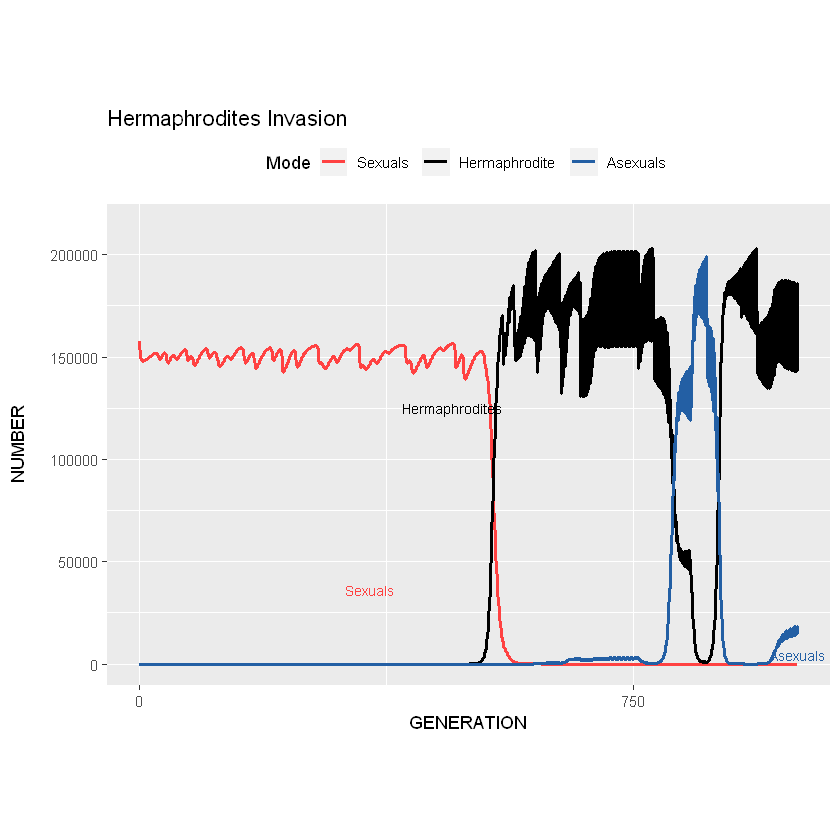

In [76]:
#using ggplot2 to plot Sexual, Asexual, and Hermaphrodite hosts through generations 
Fig13 <- data.frame("Generation" = 0:T, "Number" = SexHost, "Mode" = rep("Sexuals", 10001))
Fig13s1 <- data.frame("Generation" = 0:T, "Number" = HermHost, "Mode" = rep("Hermaphrodite", 10001))
Fig13s2 <- data.frame("Generation" = 0:T, "Number" = AsexHost, "Mode" = rep("Asexuals", 10001))
Fig13 <- rbind(Fig13, Fig13s1, Fig13s2 )

ggplot(Fig13, aes(x=Generation, y=Number, color=Mode)) +
  geom_line(size=1) +
  scale_x_continuous(name="GENERATION",  limits =c(0, 1000), breaks=seq(0, 10000, 750)) + 
  scale_y_continuous(name="NUMBER\n", limits = c(0, Kasex + 30000)) +
  scale_color_manual(values = c(Sexuals = "#FF4242", Hermaphrodite = "#000000", Asexuals = "#235FA4"))  +
  annotate(geom = "text", x= 1000, y = 4500, label = "Asexuals", color = "#235FA4", size = 3) +
  annotate(geom = "text", x= 350, y = 36000, label = "Sexuals", color = "#FF4242", size = 3) +
  annotate(geom = "text", x= 475, y = 125000, label = "Hermaphrodites", color = "#000000", size = 3) +
  theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
  ggtitle(label = 'Hermaphrodites Invasion')


In [56]:
N = 100

nAsex = vector()
nHerm = vector()
nSex = vector()
meanAsex = vector()
meanHerm = vector()
meanSex = vector()
CIAsex = vector()
CIHerm = vector()
CISex = vector()
Hai = vector()

In [23]:
for ( n in 1:N){ 
  
  
  # haploid organism and 2 loci 
  # frequencies of allele in sexual population 
  
  rNumber = vector() 
  rNumber[1] = runif(1)
  rNumber[2] = runif(1)
  rNumber[3] = runif(1)
  rNumber[4] = runif(1)
  SUmrNumber = sum (rNumber)
  
  gAB0Sex = rNumber[1] / SUmrNumber
  gAb0Sex = rNumber[2] / SUmrNumber
  gaB0Sex = rNumber[3] / SUmrNumber
  gab0Sex = rNumber[4] / SUmrNumber
  
  SexHostGeneSpace = vector()  #shows frequencies of every genotypes in the  initial sexual host population
  SexHostGeneSpace[1] = gAB0Sex * gAB0Sex * Sex
  SexHostGeneSpace[2] = gAb0Sex * gAb0Sex * Sex
  SexHostGeneSpace[3] = gaB0Sex * gaB0Sex * Sex
  SexHostGeneSpace[4] = gab0Sex * gab0Sex * Sex
  SexHostGeneSpace[5] = 2 * gAB0Sex * gAb0Sex * Sex
  SexHostGeneSpace[6] = 2 * gAB0Sex * gaB0Sex * Sex
  SexHostGeneSpace[7] = 2 * gAB0Sex * gab0Sex * Sex
  SexHostGeneSpace[8] = 2 * gAb0Sex * gaB0Sex * Sex
  SexHostGeneSpace[9] = 2 * gAb0Sex * gab0Sex * Sex
  SexHostGeneSpace[10] = 2 * gaB0Sex * gab0Sex * Sex 
  
  
  SexHostGeneSpaceInf = vector() # shows frequencies of every genotypes in the initial infected sexual host population
  SexHostGeneSpaceUninf = vector() # shows frequencies of every genotypes in the initial uninfected sexual host population
  
  
  # haploid organism and 2 loci 
  # frequencies of allele in sexual population 
  
  rNumber = vector() 
  rNumber[1] = runif(1)
  rNumber[2] = runif(1)
  rNumber[3] = runif(1)
  rNumber[4] = runif(1)
  SUmrNumber = sum (rNumber)
  
  gAB0Asex = rNumber[1] / SUmrNumber
  gAb0Asex = rNumber[2] / SUmrNumber
  gaB0Asex = rNumber[3] / SUmrNumber
  gab0Asex = rNumber[4] / SUmrNumber
  
  AsexHostGeneSpace = vector()  #shows frequencies of every genotypes in the  initial asexual host population
  AsexHostGeneSpace[1] = gAB0Asex * gAB0Asex * 200
  AsexHostGeneSpace[2] = gAb0Asex * gAb0Asex * 200
  AsexHostGeneSpace[3] = gaB0Asex * gaB0Asex * 200
  AsexHostGeneSpace[4] = gab0Asex * gab0Asex * 200
  AsexHostGeneSpace[5] = 2 * gAB0Asex * gAb0Asex * 200
  AsexHostGeneSpace[6] = 2 * gAB0Asex * gaB0Asex * 200
  AsexHostGeneSpace[7] = 2 * gAB0Asex * gab0Asex * 200
  AsexHostGeneSpace[8] = 2 * gAb0Asex * gaB0Asex * 200
  AsexHostGeneSpace[9] = 2 * gAb0Asex * gab0Asex * 200
  AsexHostGeneSpace[10] = 2 * gaB0Asex * gab0Asex * 200
  
  
  AsexHostGeneSpaceInf = vector() # shows frequencies of every genotypes in the initial infected asexual host population
  AsexHostGeneSpaceUninf = vector() # shows frequencies of every genotypes in the initial uninfected asexual host population
  
  
  # haploid organism and 2 loci 
  # frequencies of allele in sexual population 
  
  rNumber = vector() 
  rNumber[1] = runif(1)
  rNumber[2] = runif(1)
  rNumber[3] = runif(1)
  rNumber[4] = runif(1)
  SUmrNumber = sum (rNumber)
  
  gAB0Herm = rNumber[1] / SUmrNumber
  gAb0Herm = rNumber[2] / SUmrNumber
  gaB0Herm = rNumber[3] / SUmrNumber
  gab0Herm = rNumber[4] / SUmrNumber
  
  HermHostGeneSpace = vector() # shows frequencies of every genotypes in the  initial sexual host population
  HermHostGeneSpace[1] = gAB0Herm * gAB0Herm * 2
  HermHostGeneSpace[2] = gAb0Herm * gAb0Herm * 2
  HermHostGeneSpace[3] = gaB0Herm * gaB0Herm * 2
  HermHostGeneSpace[4] = gab0Herm * gab0Herm * 2
  HermHostGeneSpace[5] = 2 * gAB0Herm * gAb0Herm * 2
  HermHostGeneSpace[6] = 2 * gAB0Herm * gaB0Herm * 2
  HermHostGeneSpace[7] = 2 * gAB0Herm * gab0Herm * 2
  HermHostGeneSpace[8] = 2 * gAb0Herm * gaB0Herm * 2
  HermHostGeneSpace[9] = 2 * gAb0Herm * gab0Herm * 2
  HermHostGeneSpace[10] = 2 * gaB0Herm * gab0Herm * 2
  
  
  
  
  HermHostGeneSpaceInf = vector() # shows frequencies of every genotypes in the initial infected asexual host population
  HermHostGeneSpaceUninf = vector() # shows frequencies of every genotypes in the initial uninfected asexual host population
  
  
  # haploid organism and 2 loci 
  # frequencies of allele in sexual population 
  rNumber = vector() 
  rNumber[1] = runif(1)
  rNumber[2] = runif(1)
  rNumber[3] = runif(1)
  rNumber[4] = runif(1)
  SUmrNumber = sum (rNumber)
  
  gAB0 = rNumber[1] / SUmrNumber
  gAb0 = rNumber[2] / SUmrNumber
  gaB0 = rNumber[3] / SUmrNumber
  gab0 = rNumber[4] / SUmrNumber
  
  
  ParaGeneSpace = vector() # shows frequencies of every genotypes in the  initial sexual host population
  ParaGeneSpace[1] = gAB0 * gAB0 
  ParaGeneSpace[2] = gAb0 * gAb0 
  ParaGeneSpace[3] = gaB0 * gaB0 
  ParaGeneSpace[4] = gab0 * gab0 
  ParaGeneSpace[5] = 2 * gAB0 * gAb0 
  ParaGeneSpace[6] = 2 * gAB0 * gaB0 
  ParaGeneSpace[7] = 2 * gAB0 * gab0 
  ParaGeneSpace[8] = 2 * gAb0 * gaB0 
  ParaGeneSpace[9] = 2 * gAb0 * gab0 
  ParaGeneSpace[10] = 2 * gaB0 * gab0 
  
  
  # initial conditions.  SexHost initiated at Ksex.  AsexHost at 0. HermHost at 0.
  SexHost = Sex 
  AsexHost = 0
  HermHost = 0
  
  # initial conditions.  Para initiated at 0.  
  Para = 0
  
  # introducing vectors 
  outSexHost = vector()  # outSexHost vector
  outSexHost[1]=SexHost[1]
  
  outHermHost = vector() # outHermHost vector
  outHermHost[1] = AsexHost[1]
  
  outAsexHost = vector()  # outAsexHost  vector
  outAsexHost[1]=AsexHost[1]
  
  outPara = vector()  # outPara vector
  outPara[1]=Para[1]
  
  ############################################################
  gABSex = vector()
  gAbSex = vector()
  gaBSex = vector()
  gabSex = vector() 
  
  nABSex = vector()
  nAbSex = vector()
  naBSex = vector()
  nabSex = vector()
  
  gABSex[1] = gAB0Sex 
  gAbSex[1] = gAb0Sex
  gaBSex[1] = gaB0Sex 
  gabSex[1] = gab0Sex 
  
  
  nABSex[1] = gAB0Sex * Sex
  nAbSex[1] = gAb0Sex * Sex
  naBSex[1] = gaB0Sex * Sex
  nabSex[1] = gab0Sex * Sex
  ###########################################################
  gABHerm = vector()
  gAbHerm = vector()
  gaBHerm = vector()
  gabHerm = vector() 
  
  nABHerm = vector()
  nAbHerm = vector()
  naBHerm = vector()
  nabHerm = vector()
  
  gABHerm[1] = gAB0Herm 
  gAbHerm[1] = gAb0Herm
  gaBHerm[1] = gaB0Herm
  gabHerm[1] = gab0Herm 
  
  
  nABHerm[1] = gAB0Herm * 2 
  nAbHerm[1] = gAb0Herm * 2 
  naBHerm[1] = gaB0Herm * 2
  nabHerm[1] = gab0Herm * 2
  ###########################################################################
  
  gABAsex = vector()
  gAbAsex = vector()
  gaBAsex = vector()
  gabAsex = vector() 
  
  nABAsex = vector()
  nAbAsex = vector()
  naBAsex = vector()
  nabAsex = vector()
  
  gABAsex[1] = gAB0Asex 
  gAbAsex[1] = gAb0Asex 
  gaBAsex[1] = gaB0Asex 
  gabAsex[1] = gab0Asex 
  
  
  nABAsex[1] = gAB0Asex * 200
  nAbAsex[1] = gAb0Asex * 200
  naBAsex[1] = gaB0Asex * 200
  nabAsex[1] = gab0Asex * 200
  
  
  ###########################################################################
  DSex = vector()
  DHerm = vector()
  DAsex = vector()
  
  
  
  
  
  
  # calculation of abundance through generations 
  # calculation of abundance through generations 
  for(i in 1: T) {
    
    if (i >= Gpara) {
      
      Para[i] = 2 # setting initial parasite population 
      
    } else  {
      
      Para[i] = 0
      
    }
    if(i == Gherm)
    {
      
      HermHost[i] =  2 #  setting initial hermaphrodite population 
      
    }
    if (is.na(HermHost[i])){
      
      HermHost[i] = 0
      
    }
    if(i == Gasex)
    {
      
      AsexHost[i] =  200 #  setting initial hermaphrodite population 
      
    }
    if (is.na(AsexHost[i])){
      
      AsexHost[i] = 0
      
    }
    
    SumInfHerm = 0
    SumInfSex = 0 
    SumInfAsex = 0 
    ####################################################################################################################################################################  
    # Sexual Host 
    outSexHost[i] = SexHost[i]
    
    
    
    
    # calculating  infection 
    if (Para[i] == 0) {
      for( z in 1:length(SexHostGeneSpace) ) {
        SexHostGeneSpaceInf[z] = 0
        SexHostGeneSpaceUninf[z] = SexHostGeneSpace[z]
        if( is.na(SexHostGeneSpaceUninf[z]) ) {SexHostGeneSpaceUninf[z] = 0 }
      }
    } else {
      
      SexHostGeneSpaceInf[1] = SexHostGeneSpace[1] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] )
      SexHostGeneSpaceInf[2] = SexHostGeneSpace[2] * (ParaGeneSpace[2] + ParaGeneSpace[9])
      SexHostGeneSpaceInf[3] = SexHostGeneSpace[3] * (ParaGeneSpace[3] + ParaGeneSpace[10])
      SexHostGeneSpaceInf[4] = SexHostGeneSpace[4] * (ParaGeneSpace[4])
      SexHostGeneSpaceInf[5] = SexHostGeneSpace[5] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[6] = SexHostGeneSpace[6] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[7] = SexHostGeneSpace[7] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[8] = SexHostGeneSpace[8] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
      SexHostGeneSpaceInf[9] = SexHostGeneSpace[9] * (ParaGeneSpace[2] + ParaGeneSpace[9])
      SexHostGeneSpaceInf[10] = SexHostGeneSpace[10] * (ParaGeneSpace[3] + ParaGeneSpace[10])
      
      SexHostGeneSpaceUninf[1] = SexHostGeneSpace[1] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] ))
      SexHostGeneSpaceUninf[2] = SexHostGeneSpace[2] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
      SexHostGeneSpaceUninf[3] = SexHostGeneSpace[3] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
      SexHostGeneSpaceUninf[4] = SexHostGeneSpace[4] * ( 1- (ParaGeneSpace[4]))
      SexHostGeneSpaceUninf[5] = SexHostGeneSpace[5] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[6] = SexHostGeneSpace[6] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[7] = SexHostGeneSpace[7] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[8] = SexHostGeneSpace[8] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
      SexHostGeneSpaceUninf[9] = SexHostGeneSpace[9] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
      SexHostGeneSpaceUninf[10] = SexHostGeneSpace[10] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
      
      if( is.na(SexHostGeneSpaceInf[z]) ) {SexHostGeneSpaceInf[z] = 0 }
      if( is.na(SexHostGeneSpaceUninf[z]) ) {SexHostGeneSpaceUninf[z] = 0 }
    }
    
    
    
    nABSex[i+1] = (  ( SexHostGeneSpaceUninf[1] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[5] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[6] * 0.5  *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 *  P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))     
    nABSex[i+1] = nABSex[i+1] + (  ( SexHostGeneSpaceInf[1] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[5] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[6] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * ( 1- P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * P )  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nAbSex[i+1] = (  ( SexHostGeneSpaceUninf[2] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[5] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))  + ( SexHostGeneSpaceUninf[9] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 * ( 1- P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nAbSex[i+1] = nAbSex[i+1] + (  ( SexHostGeneSpaceInf[2] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[5] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[9] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * ( 1- P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * P )  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    naBSex[i+1] = (  ( SexHostGeneSpaceUninf[3] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[6] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[10] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 * (1 - P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    naBSex[i+1] = naBSex[i+1] + (  ( SexHostGeneSpaceInf[3] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[6] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[10] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * (1 - P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * P ) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nabSex[i+1] = (  ( SexHostGeneSpaceUninf[4] *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[10] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[9] * 0.5 *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceUninf[8] * 0.5 * P ) *(1 - ssex)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    nabSex[i+1] = nabSex[i+1] + (  ( SexHostGeneSpaceInf[4] *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[10] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[9] * 0.5 *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[7] * 0.5 * (1 - P) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( SexHostGeneSpaceInf[8] * 0.5 * P ) *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
    
    #nABSex[i+1] = ( ( SexHostGeneSpaceInf[1] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[1] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 *  P *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #nAbSex[i+1] = ( ( SexHostGeneSpaceInf[2] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[2] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #naBSex[i+1] = ( ( SexHostGeneSpaceInf[3] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[3] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    #naBSex[i+1] = ( ( SexHostGeneSpaceInf[4] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( SexHostGeneSpaceUninf[4] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( SexHostGeneSpaceUninf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
    
    if( is.na(nABSex[i+1]) ) {nABSex[i+1] = 0 }
    if( is.na(nAbSex[i+1]) ) {nAbSex[i+1] = 0 }
    if( is.na(naBSex[i+1]) ) {naBSex[i+1] = 0 }
    if( is.na(nabSex[i+1]) ) {nabSex[i+1] = 0 }    
    
    
    if(nABSex[i+1] < 0.01) {nABSex[i+1] = 0 }
    if(nAbSex[i+1] < 0.01) {nAbSex[i+1] = 0 }
    if(naBSex[i+1] < 0.01) {naBSex[i+1] = 0 }
    if(nabSex[i+1] < 0.01) {nabSex[i+1] = 0 }
    
    
    
    SexHost[i+1] =  SexHost[i] + nABSex[i+1] + nAbSex[i+1] + naBSex[i+1] + nabSex[i+1] - d *(SexHost[i])
    
    nABSex[i+1] = nABSex[i+1] + nABSex[i] * (1-d)
    nAbSex[i+1] = nAbSex[i+1] + nAbSex[i] * (1-d)
    naBSex[i+1] = naBSex[i+1] + naBSex[i] * (1-d)
    nabSex[i+1] = nabSex[i+1] + nabSex[i] * (1-d)
    
    gABSex[i + 1] = nABSex[i+1] / SexHost[i+1]
    gAbSex[i + 1] = nAbSex[i+1] / SexHost[i+1]
    gaBSex[i + 1] = naBSex[i+1] / SexHost[i+1]
    gabSex[i + 1] = nabSex[i+1] / SexHost[i+1] 
    DSex[i] = ( gABSex[i + 1] * gabSex[i + 1] ) - (gAbSex[i + 1] * gaBSex[i + 1])
    
    if( is.na(gABSex[i+1]) ) {gABSex[i+1] = 0 }
    if( is.na(gAbSex[i+1]) ) {gAbSex[i+1] = 0 }
    if( is.na(gaBSex[i+1]) ) {gaBSex[i+1] = 0 }
    if( is.na(gabSex[i+1]) ) {gabSex[i+1] = 0 }    
    
    
    SexHostGeneSpace[1] = gABSex[i + 1] * gABSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[2] = gAbSex[i + 1] * gAbSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[3] = gaBSex[i + 1] * gaBSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[4] = gabSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[5] = 2 * gABSex[i + 1] * gAbSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[6] = 2 * gABSex[i + 1] * gaBSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[7] = 2 * gABSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[8] = 2 * gAbSex[i + 1] * gaBSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[9] = 2 * gAbSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
    SexHostGeneSpace[10] = 2 * gaBSex[i + 1] * gabSex[i + 1] * SexHost[i+1]
    
    
    
    
    # calculating abundance of infecteds 
    for (z in 1:length(SexHostGeneSpace)) {
      
      SumInfSex = SumInfSex + SexHostGeneSpaceInf[z] 
      
    }
    
    
    # setting a minimum abundance for host population 
    if ( SexHost[i] < 0.001) {
      
      SexHost[i+1] = 0
      
    }
    
    #############################################################################################################################################################################################  
    
    # Hermaphrodite Host 
    outHermHost[i] = HermHost[i]
    if (HermHost[i] == 0){
      
      HermHost[i+1] = 0
      nABHerm[i+1] = nABHerm[1] 
      nAbHerm[i+1] = nAbHerm[1] 
      naBHerm[i+1] = naBHerm[1] 
      nabHerm[i+1] = nabHerm[1] 
      for( z in 1:length(HermHostGeneSpace) ) {
        
        
        HermHostGeneSpaceInf[z] = 0
        HermHostGeneSpaceUninf[z] = 0
        
      }
      
    } else { 
      for( z in 1:length(HermHostGeneSpace) ) {
        
        # calculating  infection 
        if (Para[i] == 0) {
          
          HermHostGeneSpaceInf[z] = 0
          HermHostGeneSpaceUninf[z] = HermHostGeneSpace[z]
          if( is.na(HermHostGeneSpaceUninf[z]) ) {HermHostGeneSpaceUninf[z] = 0 }
          
        } else {
          
          HermHostGeneSpaceInf[1] = HermHostGeneSpace[1] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] )
          HermHostGeneSpaceInf[2] = HermHostGeneSpace[2] * (ParaGeneSpace[2] + ParaGeneSpace[9])
          HermHostGeneSpaceInf[3] = HermHostGeneSpace[3] * (ParaGeneSpace[3] + ParaGeneSpace[10])
          HermHostGeneSpaceInf[4] = HermHostGeneSpace[4] * (ParaGeneSpace[4])
          HermHostGeneSpaceInf[5] = HermHostGeneSpace[5] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
          HermHostGeneSpaceInf[6] = HermHostGeneSpace[6] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
          HermHostGeneSpaceInf[7] = HermHostGeneSpace[7] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
          HermHostGeneSpaceInf[8] = HermHostGeneSpace[8] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
          HermHostGeneSpaceInf[9] = HermHostGeneSpace[9] * (ParaGeneSpace[2] + ParaGeneSpace[9])
          HermHostGeneSpaceInf[10] = HermHostGeneSpace[10] * (ParaGeneSpace[3] + ParaGeneSpace[10])
          
          HermHostGeneSpaceUninf[1] = HermHostGeneSpace[1] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] ))
          HermHostGeneSpaceUninf[2] = HermHostGeneSpace[2] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
          HermHostGeneSpaceUninf[3] = HermHostGeneSpace[3] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
          HermHostGeneSpaceUninf[4] = HermHostGeneSpace[4] * ( 1- (ParaGeneSpace[4]))
          HermHostGeneSpaceUninf[5] = HermHostGeneSpace[5] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
          HermHostGeneSpaceUninf[6] = HermHostGeneSpace[6] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
          HermHostGeneSpaceUninf[7] = HermHostGeneSpace[7] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
          HermHostGeneSpaceUninf[8] = HermHostGeneSpace[8] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
          HermHostGeneSpaceUninf[9] = HermHostGeneSpace[9] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
          HermHostGeneSpaceUninf[10] = HermHostGeneSpace[10] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
          
          if( is.na(HermHostGeneSpaceInf[z]) ) {HermHostGeneSpaceInf[z] = 0 }
          if( is.na(HermHostGeneSpaceUninf[z]) ) {HermHostGeneSpaceUninf[z] = 0 }
          
        }
        
      }
      
      nABHerm[i+1] = (  ( HermHostGeneSpaceUninf[1] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[5] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[6] * 0.5  *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 *  P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))     
      nABHerm[i+1] = nABHerm[i+1] + (  ( HermHostGeneSpaceInf[1] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[5] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[6] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * ( 1- P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * P )  *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      nAbHerm[i+1] = (  ( HermHostGeneSpaceUninf[2] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[5] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))  + ( HermHostGeneSpaceUninf[9] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 * ( 1- P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      nAbHerm[i+1] = nAbHerm[i+1] + (  ( HermHostGeneSpaceInf[2] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[5] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[9] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * ( 1- P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * P )  *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      naBHerm[i+1] = (  ( HermHostGeneSpaceUninf[3] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[6] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[10] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 * (1 - P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      naBHerm[i+1] = naBHerm[i+1] + (  ( HermHostGeneSpaceInf[3] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[6] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[10] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * (1 - P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * P ) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      nabHerm[i+1] = (  ( HermHostGeneSpaceUninf[4] *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[10] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[9] * 0.5 *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceUninf[8] * 0.5 * P ) *(1 - sherm)* (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      nabHerm[i+1] = nabHerm[i+1] + (  ( HermHostGeneSpaceInf[4] *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[10] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[9] * 0.5 *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[7] * 0.5 * (1 - P) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( HermHostGeneSpaceInf[8] * 0.5 * P ) *(1 - sherm)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) 
      
      #nABSex[i+1] = ( ( HermHostGeneSpaceInf[1] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[1] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 *  P *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      #nAbSex[i+1] = ( ( HermHostGeneSpaceInf[2] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[2] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      #naBSex[i+1] = ( ( HermHostGeneSpaceInf[3] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[3] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      #naBSex[i+1] = ( ( HermHostGeneSpaceInf[4] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( HermHostGeneSpaceUninf[4] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( HermHostGeneSpaceUninf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      
      if( is.na(nABHerm[i+1]) ) {nABHerm[i+1] = 0 }
      if( is.na(nAbHerm[i+1]) ) {nAbHerm[i+1] = 0 }
      if( is.na(naBHerm[i+1]) ) {naBHerm[i+1] = 0 }
      if( is.na(nabHerm[i+1]) ) {nabHerm[i+1] = 0 }    
      
      
      if(nABHerm[i+1] < 0) {nABHerm[i+1] = 0 }
      if(nAbHerm[i+1] < 0) {nAbHerm[i+1] = 0 }
      if(naBHerm[i+1] < 0) {naBHerm[i+1] = 0 }
      if(nabHerm[i+1] < 0) {nabHerm[i+1] = 0 }
      
      
      
      HermHost[i+1] = HermHost[i] + nABHerm[i+1] + nAbHerm[i+1] + naBHerm[i+1] + nabHerm[i+1] - d * (HermHost[i])
      
      nABHerm[i+1] = nABHerm[i+1] + nABHerm[i] * (1-d)
      nAbHerm[i+1] = nAbHerm[i+1] + nAbHerm[i] * (1-d)
      naBHerm[i+1] = naBHerm[i+1] + naBHerm[i] * (1-d)
      nabHerm[i+1] = nabHerm[i+1] + nabHerm[i] * (1-d)
      
      gABHerm[i + 1] = nABHerm[i+1] / HermHost[i+1]
      gAbHerm[i + 1] = nAbHerm[i+1] / HermHost[i+1]
      gaBHerm[i + 1] = naBHerm[i+1] / HermHost[i+1]
      gabHerm[i + 1] = nabHerm[i+1] / HermHost[i+1] 
      DHerm[i] = ( gABHerm[i + 1] * gabHerm[i + 1] ) - (gAbHerm[i + 1] * gaBHerm[i + 1])
      
      if( is.na(gABHerm[i+1]) ) {gABHerm[i+1] = 0 }
      if( is.na(gAbHerm[i+1]) ) {gAbHerm[i+1] = 0 }
      if( is.na(gaBHerm[i+1]) ) {gaBHerm[i+1] = 0 }
      if( is.na(gabHerm[i+1]) ) {gabHerm[i+1] = 0 }    
      
      
      
      HermHostGeneSpace[1] = gABHerm[i + 1] * gABHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[2] = gAbHerm[i + 1] * gAbHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[3] = gaBHerm[i + 1] * gaBHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[4] = gabHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[5] = 2 * gABHerm[i + 1] * gAbHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[6] = 2 * gABHerm[i + 1] * gaBHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[7] = 2 * gABHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[8] = 2 * gAbHerm[i + 1] * gaBHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[9] = 2 * gAbHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
      HermHostGeneSpace[10] = 2 * gaBHerm[i + 1] * gabHerm[i + 1] * HermHost[i+1]
      
      
      
      
      # calculating abundance of infecteds 
      for (z in 1:length(HermHostGeneSpace)) {
        
        SumInfHerm = SumInfHerm + HermHostGeneSpaceInf[z] 
        
      }
      
      
      # setting a minimum abundance for host population 
      if ( HermHost[i] < 0.001) {
        
        HermHost[i+1] = 0
        
      }
      
      
    }
    #######################################################################################################################################    
    
    
    # Asexual Host 
    outAsexHost[i] = AsexHost[i]
    if (AsexHost[i] == 0){
      
      nABAsex[i+1] = nABAsex[1] 
      nAbAsex[i+1] = nAbAsex[1] 
      naBAsex[i+1] = naBAsex[1] 
      nabAsex[i+1] = nabAsex[1] 
      
      AsexHost[i+1] = 0 
      for( z in 1:length(AsexHostGeneSpace) ) {
        
        
        AsexHostGeneSpaceInf[z] = 0
        AsexHostGeneSpaceUninf[z] = 0
        
      }
      
    } else { 
      
      
      # calculating  infection 
      if (Para[i] == 0) {
        for( z in 1:length(AsexHostGeneSpace) ) {
          AsexHostGeneSpaceInf[z] = 0
          AsexHostGeneSpaceUninf[z] = AsexHostGeneSpace[z]
          if( is.na(AsexHostGeneSpaceUninf[z]) ) {AsexHostGeneSpaceUninf[z] = 0 }
        }
        
      } else {
        
        AsexHostGeneSpaceInf[1] = AsexHostGeneSpace[1] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] )
        AsexHostGeneSpaceInf[2] = AsexHostGeneSpace[2] * (ParaGeneSpace[2] + ParaGeneSpace[9])
        AsexHostGeneSpaceInf[3] = AsexHostGeneSpace[3] * (ParaGeneSpace[3] + ParaGeneSpace[10])
        AsexHostGeneSpaceInf[4] = AsexHostGeneSpace[4] * (ParaGeneSpace[4])
        AsexHostGeneSpaceInf[5] = AsexHostGeneSpace[5] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[6] = AsexHostGeneSpace[6] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[7] = AsexHostGeneSpace[7] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[8] = AsexHostGeneSpace[8] * (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8])
        AsexHostGeneSpaceInf[9] = AsexHostGeneSpace[9] * (ParaGeneSpace[2] + ParaGeneSpace[9])
        AsexHostGeneSpaceInf[10] = AsexHostGeneSpace[10] * (ParaGeneSpace[3] + ParaGeneSpace[10])
        
        AsexHostGeneSpaceUninf[1] = AsexHostGeneSpace[1] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8] ))
        AsexHostGeneSpaceUninf[2] = AsexHostGeneSpace[2] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
        AsexHostGeneSpaceUninf[3] = AsexHostGeneSpace[3] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
        AsexHostGeneSpaceUninf[4] = AsexHostGeneSpace[4] * ( 1- (ParaGeneSpace[4]))
        AsexHostGeneSpaceUninf[5] = AsexHostGeneSpace[5] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[6] = AsexHostGeneSpace[6] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[7] = AsexHostGeneSpace[7] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[8] = AsexHostGeneSpace[8] * ( 1- (ParaGeneSpace[1] + ParaGeneSpace[5] + ParaGeneSpace[6] + ParaGeneSpace[7] + ParaGeneSpace[8]))
        AsexHostGeneSpaceUninf[9] = AsexHostGeneSpace[9] * ( 1- (ParaGeneSpace[2] + ParaGeneSpace[9]))
        AsexHostGeneSpaceUninf[10] = AsexHostGeneSpace[10] * ( 1- (ParaGeneSpace[3] + ParaGeneSpace[10]))
        
        if( is.na(AsexHostGeneSpaceInf[z]) ) {AsexHostGeneSpaceInf[z] = 0 }
        if( is.na(AsexHostGeneSpaceUninf[z]) ) {AsexHostGeneSpaceUninf[z] = 0 }
        
      }
      
      
      
      nABAsex[i+1] = (  ( AsexHostGeneSpaceUninf[1] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[7] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) )    
      nABAsex[i+1] = nABAsex[i+1] + (  ( AsexHostGeneSpaceInf[1] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[5] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[6] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[7] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      nAbAsex[i+1] = (  ( AsexHostGeneSpaceUninf[2] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])))  + ( AsexHostGeneSpaceUninf[9] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[8] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      nAbAsex[i+1] = nAbAsex[i+1] + (  ( AsexHostGeneSpaceInf[2] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[5] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[9] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[8] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      naBAsex[i+1] = (  ( AsexHostGeneSpaceUninf[3] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[8] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      naBAsex[i+1] = naBAsex[i+1] + (  ( AsexHostGeneSpaceInf[3] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[6] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[10] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[8] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      nabAsex[i+1] = (  ( AsexHostGeneSpaceUninf[4] * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[9] * 0.5 * (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceUninf[7] * 0.5 *  (bu - au*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      nabAsex[i+1] = nabAsex[i+1] + (  ( AsexHostGeneSpaceInf[4] *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[10] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[9] * 0.5 *(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) + ( AsexHostGeneSpaceInf[7] * 0.5 * (bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i]))) ) 
      
      #nABSex[i+1] = ( ( AsexHostGeneSpaceInf[1] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[1] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * (1 - P)  *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 *  P *(1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      #nAbSex[i+1] = ( ( AsexHostGeneSpaceInf[2] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[5] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[2] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[5] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      #naBSex[i+1] = ( ( AsexHostGeneSpaceInf[3] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[6] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[3] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[6] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      #naBSex[i+1] = ( ( AsexHostGeneSpaceInf[4] * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[10] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[9] * 0.5 * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceInf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) + (  ( AsexHostGeneSpaceUninf[4] * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[10] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[9] * 0.5 * (1 - ssex)*(bu - au*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[7] * 0.5 * (1 - P) * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) + ( AsexHostGeneSpaceUninf[8] * 0.5 * P * (1 - ssex)*(bi - ai*(HermHost[i] + SexHost[i] + AsexHost[i])) ) ) 
      
      if( is.na(nABAsex[i+1]) ) {nABAsex[i+1] = 0 }
      if( is.na(nAbAsex[i+1]) ) {nAbAsex[i+1] = 0 }
      if( is.na(naBAsex[i+1]) ) {naBAsex[i+1] = 0 }
      if( is.na(nabAsex[i+1]) ) {nabAsex[i+1] = 0 }    
      
      
      if(nABAsex[i+1] < 0) {nABAsex[i+1] = 0 }
      if(nAbAsex[i+1] < 0) {nAbAsex[i+1] = 0 }
      if(naBAsex[i+1] < 0) {naBAsex[i+1] = 0 }
      if(nabAsex[i+1] < 0) {nabAsex[i+1] = 0 }
      
      
      
      AsexHost[i+1] = AsexHost[i] + nABAsex[i+1] + nAbAsex[i+1] + naBAsex[i+1] + nabAsex[i+1] - d * (AsexHost[i])
      
      
      nABAsex[i+1] = nABAsex[i+1] + nABAsex[i] * (1-d)
      nAbAsex[i+1] = nAbAsex[i+1] + nAbAsex[i] * (1-d)
      naBAsex[i+1] = naBAsex[i+1] + naBAsex[i] * (1-d)
      nabAsex[i+1] = nabAsex[i+1] + nabAsex[i] * (1-d)
      
      gABAsex[i + 1] = nABAsex[i+1] / AsexHost[i+1]
      gAbAsex[i + 1] = nAbAsex[i+1] / AsexHost[i+1]
      gaBAsex[i + 1] = naBAsex[i+1] / AsexHost[i+1]
      gabAsex[i + 1] = nabAsex[i+1] / AsexHost[i+1]
      
      
      if( is.na(gABAsex[i+1]) ) {gABAsex[i+1] = 0 }
      if( is.na(gAbAsex[i+1]) ) {gAbAsex[i+1] = 0 }
      if( is.na(gaBAsex[i+1]) ) {gaBAsex[i+1] = 0 }
      if( is.na(gabAsex[i+1]) ) {gabAsex[i+1] = 0 }    
      
      DHerm[i] = ( gABAsex[i + 1] * gAbAsex[i + 1] ) - (gaBAsex[i + 1] * gabAsex[i + 1])
      
      
      AsexHostGeneSpace[1] = gABAsex[i + 1] * gABAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[2] = gAbAsex[i + 1] * gAbAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[3] = gaBAsex[i + 1] * gaBAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[4] = gabAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[5] = 2 * gABAsex[i + 1] * gAbAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[6] = 2 * gABAsex[i + 1] * gaBAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[7] = 2 * gABAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[8] = 2 * gAbAsex[i + 1] * gaBAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[9] = 2 * gAbAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
      AsexHostGeneSpace[10] = 2 * gaBAsex[i + 1] * gabAsex[i + 1] * AsexHost[i+1]
      
      
      
      
      # calculating abundance of infecteds 
      for (z in 1:length(AsexHostGeneSpace)) {
        
        SumInfAsex = SumInfAsex + AsexHostGeneSpaceInf[z] 
        
      }
      
      
      # setting a minimum abundance for host population 
      if ( AsexHost[i] < 0.1) {
        
        AsexHost[i+1] = 0
        
      }
      
      
    }
    
    
    ##############################################################################################################################################
    # calculating next generation frequencies in parasite population 
    for (z in 1:length(HermHostGeneSpace) ) {
      
      if ( i > Gpara){ 
        if( is.na(SumInfSex) ) {SumInfSex = 0 } 
        if( is.na(SumInfHerm) ) {SumInfHerm = 0 } 
        if( is.na(SumInfAsex) ) {SumInfAsex = 0 } 
        
        
        if( is.na(SexHostGeneSpaceInf[z]) ) {SexHostGeneSpaceInf[z] = 0 } 
        if( is.na(HermHostGeneSpaceInf[z]) ) {HermHostGeneSpaceInf[z] = 0 } 
        if( is.na(AsexHostGeneSpaceInf[z]) ) {AsexHostGeneSpaceInf[z] = 0 } 
        
        ParaGeneSpace[z] =  (SexHostGeneSpaceInf[z] + HermHostGeneSpaceInf[z] + AsexHostGeneSpaceInf[z]) / (SumInfSex  + SumInfHerm + SumInfAsex)
        
      }
      
    }
    
  }
  nAsex[n] = AsexHost[T]
  nHerm[n] = HermHost[T]
  nSex[n] = SexHost[T]
}


In [54]:
# Create a data frame
Data_Frame <- data.frame (
  "Abundance of Sexual Host" = nSex,
  "Abundance of Asexual Host" = nAsex,
  "Abundance of Hermaphrodite Host" = nHerm
)

Data_Frame

Abundance.of.Sexual.Host,Abundance.of.Asexual.Host,Abundance.of.Hermaphrodite.Host,CIsex,CIAsex,CIHerm,ai
0,66320.49,55664.490,0,5077.557,5074.690,1.1
0,72174.36,49813.927,0,5478.777,5475.684,1.2
0,63607.55,58375.900,0,5742.839,5739.596,1.3
0,56750.19,42059.356,0,5738.390,5427.816,1.4
0,54892.03,46355.418,0,5713.716,5552.348,1.5
0,60443.42,42026.634,0,5844.541,5522.419,1.6
0,67019.34,45210.234,0,5880.085,5691.304,1.7
0,42319.28,10277.554,0,5510.645,2939.066,1.8
0,37734.68,8690.878,0,5328.666,2639.243,1.9
0,36012.65,10347.749,0,5122.647,2574.261,2.0


In [24]:
Stat_Frame <- data.frame ( 

  Mean_Sexual_Host = mean(nSex),
  SD_Sexual_Host = sd(nSex), 
  CI_Sexual_Host = sd(nSex) / sqrt(length(nSex)),
  CV_Sexual_Host = (sd(nSex) / mean(nSex)) * 100, 
  Mean_Asexual_Host = mean(nAsex), 
  SD_Asexual_Host = sd(nAsex), 
  CI_Asexual_Host = sd(nAsex) / sqrt(length(nAsex)),
  CV_Asexual_Host = (sd(nAsex) / mean(nAsex)) * 100,
  Mean_Hermaphrodite_Host = mean(nHerm),
  SD_Hermaphrodite_Host = sd(nHerm), 
  CI_Hermaphrodite_Host = sd(nHerm) / sqrt(length(nHerm)), 
  CV_Hermaphrodite_Host = (sd(nHerm) / mean(nHerm)) * 100

)

In [25]:
Stat_Frame

Mean_Sexual_Host,SD_Sexual_Host,CI_Sexual_Host,CV_Sexual_Host,Mean_Asexual_Host,SD_Asexual_Host,CI_Asexual_Host,CV_Asexual_Host,Mean_Hermaphrodite_Host,SD_Hermaphrodite_Host,CI_Hermaphrodite_Host,CV_Hermaphrodite_Host
0,0,0,NaN,85639.16,5.080977e-10,5.080977e-11,5.933006e-13,36356.74,5.084375e-10,5.084375e-11,1.398468e-12


In [26]:
SumInfSex

[1] 0

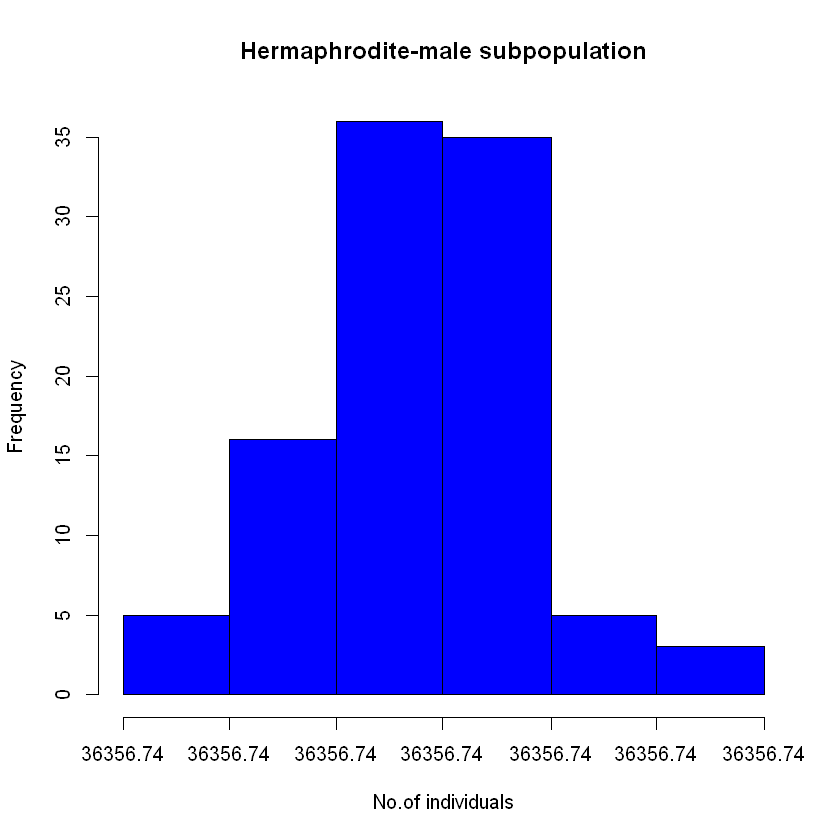

In [27]:
hist(nHerm, xlab = "No.of individuals", col = "blue", border = "black", main= "Hermaphrodite-male subpopulation")

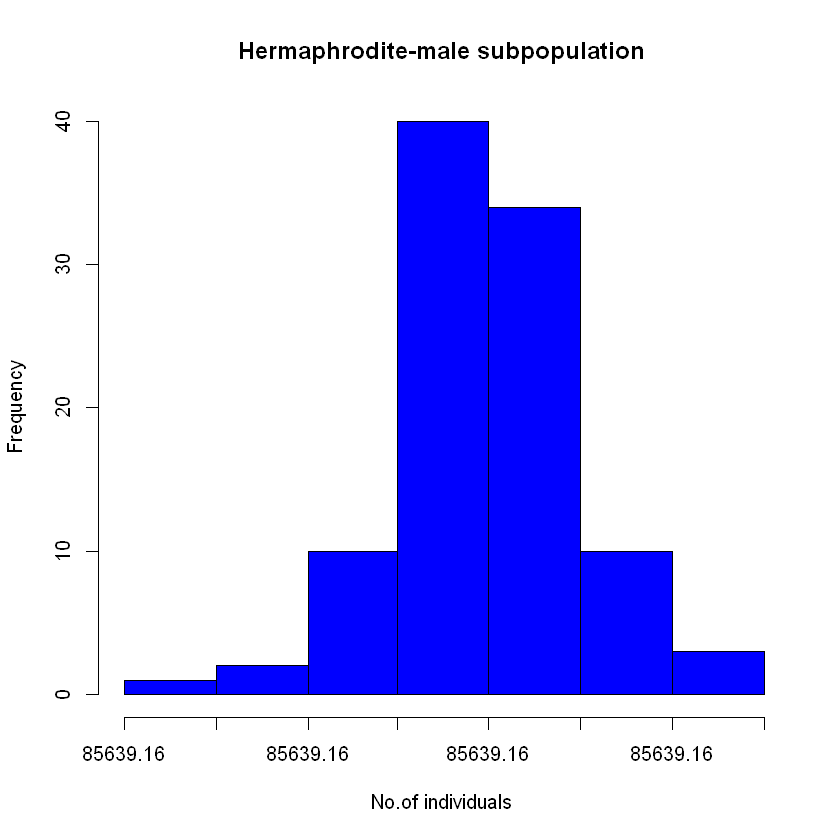

In [28]:
hist(nAsex, xlab = "No.of individuals", col = "blue", border = "black", main= "Hermaphrodite-male subpopulation")

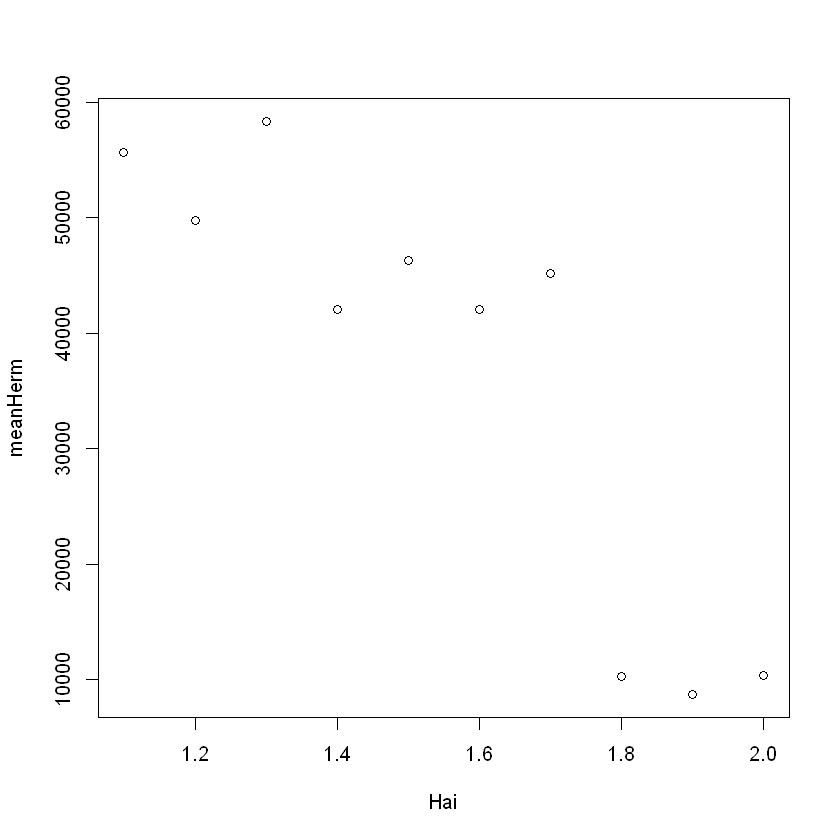

In [53]:
plot (Hai, meanHerm) 